In [ ]:
import torch
torch.__version__

'1.10.0+cu111'

# 基本使用方法

## 创建一个矩阵

In [ ]:
x = torch.empty(5, 3)
x

tensor([[-1.2067e+13,  3.0865e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  3.0865e-41],
        [ 1.1578e+27,  1.1362e+30,  7.1547e+22],
        [ 4.5828e+30,  1.2121e+04,  7.1846e+22],
        [ 9.2198e-39,  7.0374e+22, -2.3814e+12]])

In [ ]:
x = torch.rand(5, 3)
x

tensor([[0.6925, 0.1253, 0.6229],
        [0.8188, 0.6582, 0.1465],
        [0.5229, 0.4361, 0.1718],
        [0.8344, 0.5630, 0.6689],
        [0.3182, 0.1971, 0.6887]])

构建一个全零矩阵

In [ ]:
x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

直接传入数据

In [ ]:
x = torch.tensor([5.])
print(x)
print(type(x))
print(x.dtype) # 默认数据类型为float32
a = x.item()
print(a)
print(type(a))

tensor([5.])
<class 'torch.Tensor'>
torch.float32
5.0
<class 'float'>


这些操作和numpy差不多

In [ ]:
x = x.new_ones(5, 3, dtype=torch.double)

x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 0.0304,  0.2807, -1.1838],
        [ 1.9132, -0.5987, -0.3038],
        [ 0.1720, -0.5242, -2.1717],
        [-0.9431,  0.0034,  0.8380],
        [-0.2246,  0.2295,  0.3724]])

展示矩阵大小

In [ ]:
x.size() #在别的库中可能是.shape

torch.Size([5, 3])

## 基本计算方法

In [ ]:
y = torch.rand(5, 3)
x + y

tensor([[ 0.5235,  1.2364, -0.6446],
        [ 2.1390, -0.4479,  0.0943],
        [ 0.2397,  0.0691, -1.6140],
        [-0.5921,  0.7804,  1.4851],
        [-0.0745,  1.1769,  1.1438]])

In [ ]:
torch.add(x, y)    # 一样也是加法

tensor([[ 0.5235,  1.2364, -0.6446],
        [ 2.1390, -0.4479,  0.0943],
        [ 0.2397,  0.0691, -1.6140],
        [-0.5921,  0.7804,  1.4851],
        [-0.0745,  1.1769,  1.1438]])

## 索引

In [ ]:
x[:,1]

tensor([ 0.2807, -0.5987, -0.5242,  0.0034,  0.2295])

## view操作改变矩阵维度

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)    # -1代表那个维度自动计算
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## 与Numpy协同操作

In [ ]:
a = torch.ones(5)
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

先了解一些基本，然后边用边查，这是最好的学习过程

# autograde机制

框架干的最厉害的事情：把反向传播全部计算好了

## requires_grad

In [ ]:
# 方法一
x = torch.randn(3,4,requires_grad=True)
x

tensor([[ 2.2181, -1.3241, -1.6859, -1.3125],
        [-1.0587, -0.9926, -0.3700,  0.3074],
        [-0.5172, -0.9364,  1.2618, -1.0770]], requires_grad=True)

In [ ]:
# 方法二
x = torch.randn(3,4)
x.requires_grad = True
x

tensor([[-0.4489,  0.3832,  0.9398,  1.2750],
        [ 0.6243,  1.2947,  0.2171, -0.6134],
        [-0.7387,  0.9175, -0.7955,  0.8309]], requires_grad=True)

In [ ]:
b = torch.randn(3,4,requires_grad=True)

In [ ]:
t = x + b

In [ ]:
y = t.sum()
y

tensor(4.3259, grad_fn=<SumBackward0>)

In [ ]:
y.backward()

In [ ]:
b.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# 虽然没有指定t的requires_grad的值，在计算的时候用到了，就会自动设定为True

In [ ]:
x.requires_grad, b.requires_grad, t.requires_grad

(True, True, True)

## 举个例子

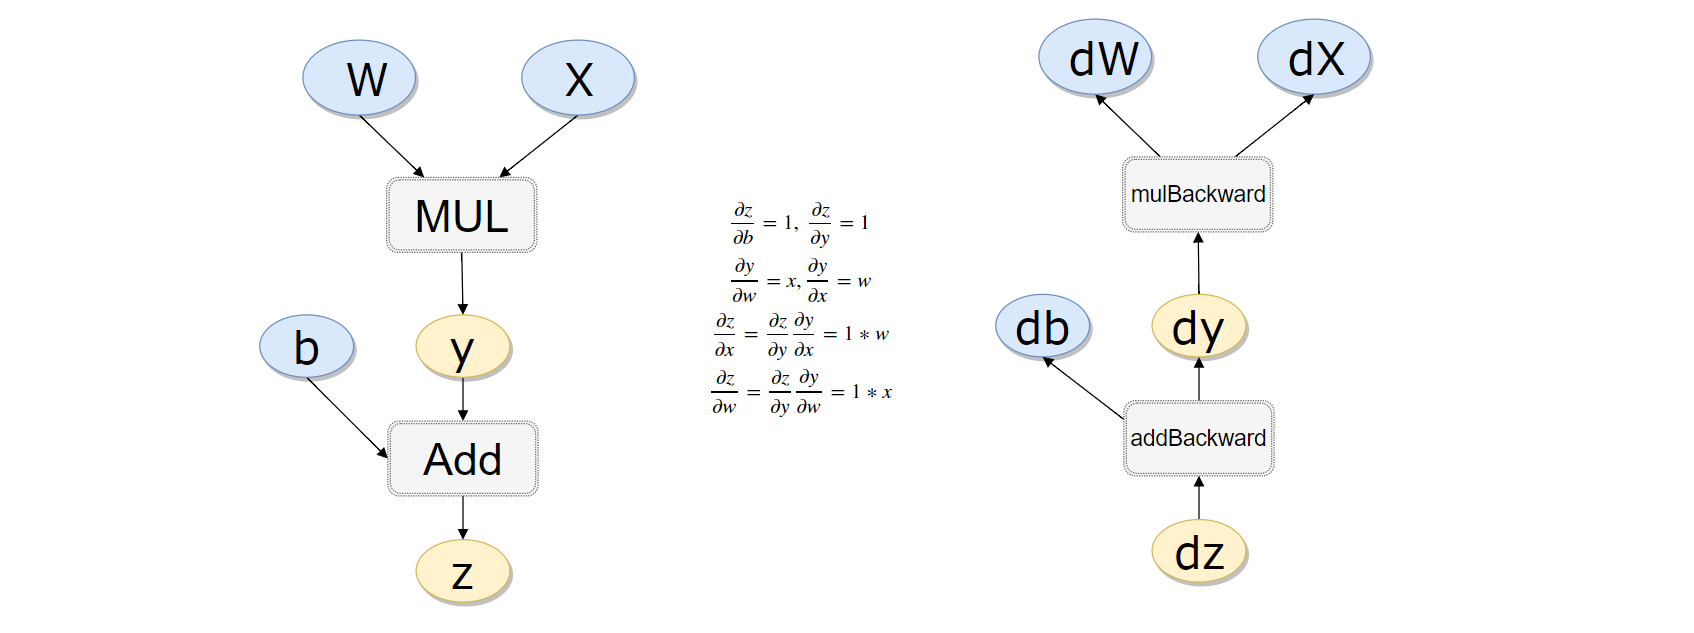

In [ ]:
x = torch.rand(3, 5)
w = torch.rand(3, 5, requires_grad=True)
b = torch.rand(3, 5, requires_grad=True)
y = w * x
print(x.size(), w.size(), b.size(), y.size())
z = b + y
z = z.sum()

torch.Size([3, 5]) torch.Size([3, 5]) torch.Size([3, 5]) torch.Size([3, 5])


In [ ]:
z.backward(retain_graph=True)    # 保证这个图能够反复backward()
b.grad, w.grad    # 如果不清空，梯度值会累加起来


# 关于retain_graph在一个forward多次backward中的使用 
# https://blog.csdn.net/qq_24502469/article/details/104559250?spm=1001.2101.3001.6650.5

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
 tensor([[0.0183, 0.4356, 0.9630, 0.7085, 0.2036],
         [0.5040, 0.9070, 0.3791, 0.8475, 0.9314],
         [0.6194, 0.0056, 0.7988, 0.0179, 0.1904]]))

# 做一个线性回归模型

## 构建一组数据x及其对应标签y

In [ ]:
import numpy as np

x_values = [i for i in range(11)]
print(x_values)

x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)    # 转成矩阵形式，用于训练
x_train.shape

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


(11, 1)

In [ ]:
y_values = [2*i+1 for i in range(11)]
print(y_values)

y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


(11, 1)

## 定义模型架构

- 线性回归模型就是一个不加激活函数的全连接层

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 无论定义多复杂的模型，都先把类定义好

class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [ ]:
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

## 指定参数和损失函数

In [ ]:
epochs = 1000
learning_rate = 0.01
# 定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 定义损失函数
criterion = nn.MSELoss()

## 训练模型

In [ ]:
for epoch in range(epochs):
  epoch = epoch + 1

  # 数据转成tensor格式
  inputs = torch.from_numpy(x_train)
  labels = torch.from_numpy(y_train)

  # 每一次迭代梯度要清零
  optimizer.zero_grad()

  # 前向传播
  outputs = model(inputs)

  # 计算损失
  loss = criterion(outputs, labels)

  # 反向传播
  loss.backward()

  # 更新权重参数
  optimizer.step()

  # 打印信息
  if epoch % 50 == 0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))



# 注释1：
# 前向传播那里，等价于model.forward(inputs)
# 可以省略是因为使用了__call__，解释见下方链接
# https://zhuanlan.zhihu.com/p/357021687
# 前向传播那里需要float32类型

# 注释2：
# 反向传播那里，看似loss只是由outputs和inputs计算出来的
# 但是outputs是由整个model计算出来的
# 所以loss.backward()可以计算整个model参数的梯度

# 注释3：
# loss 与 loss.item()
# https://discuss.pytorch.org/t/what-is-the-difference-between-loss-and-loss-item/126083
# 相当于把loss值放到了cpu上，变称一个普通的python数值

# 注释4：
# 通过源码理解optimizer.zero_grad(), loss.backward(), opyimizer.step()
# https://blog.csdn.net/PanYHHH/article/details/107361827

# 注释5
# 改一下learning_rate
# 可以看到，0.01与0.001大不一样

epoch 50, loss 0.003236989490687847
epoch 100, loss 0.0018462680745869875
epoch 150, loss 0.0010530228028073907
epoch 200, loss 0.00060060661053285
epoch 250, loss 0.0003425532777328044
epoch 300, loss 0.00019538230844773352
epoch 350, loss 0.00011143636220367625
epoch 400, loss 6.356097583193332e-05
epoch 450, loss 3.62546561518684e-05
epoch 500, loss 2.067631430691108e-05
epoch 550, loss 1.1794180863944348e-05
epoch 600, loss 6.727028903696919e-06
epoch 650, loss 3.8367684283002745e-06
epoch 700, loss 2.188083044529776e-06
epoch 750, loss 1.2482908005040372e-06
epoch 800, loss 7.119642759789713e-07
epoch 850, loss 4.0608938434161246e-07
epoch 900, loss 2.3161804563187616e-07
epoch 950, loss 1.3221318795331172e-07
epoch 1000, loss 7.540051427668004e-08


## 测试模型预测结果

In [ ]:
# 执行一下前行传播就可以了

predicted = model(torch.from_numpy(x_train))
predicted = predicted.detach().numpy() # 转成numpy格式

# 上面两天语句可以用下面一条替代
predicted = model(torch.from_numpy(x_train)).data.numpy()

print(x_train)
print(y_train)
predicted

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


array([[ 0.99948937],
       [ 2.9995627 ],
       [ 4.999636  ],
       [ 6.9997096 ],
       [ 8.9997835 ],
       [10.999857  ],
       [12.99993   ],
       [15.000004  ],
       [17.000076  ],
       [19.000149  ],
       [21.000223  ]], dtype=float32)

In [ ]:
# 补充知识
a = torch.rand((5,5), requires_grad=False)
a

tensor([[0.5757, 0.7359, 0.9240, 0.9333, 0.1411],
        [0.1900, 0.2474, 0.0666, 0.0131, 0.2874],
        [0.8933, 0.4935, 0.8779, 0.5635, 0.1104],
        [0.7632, 0.1031, 0.7168, 0.5393, 0.6289],
        [0.8854, 0.9740, 0.4378, 0.7872, 0.2904]])

In [ ]:
# Pytorch中requires_grad_(), detach(), torch.no_grad()的区别
# http://noahsnail.com/2020/05/29/2020-05-29-Pytorch%E4%B8%ADrequires_grad_(),%20detach(),%20torch.no_grad()%E7%9A%84%E5%8C%BA%E5%88%AB/

a.requires_grad_() # 将require_grad设定为True
a

tensor([[0.5757, 0.7359, 0.9240, 0.9333, 0.1411],
        [0.1900, 0.2474, 0.0666, 0.0131, 0.2874],
        [0.8933, 0.4935, 0.8779, 0.5635, 0.1104],
        [0.7632, 0.1031, 0.7168, 0.5393, 0.6289],
        [0.8854, 0.9740, 0.4378, 0.7872, 0.2904]], requires_grad=True)

In [ ]:
# 测试的时候可以用以下方法减小内存开支
with torch.no_grad():
  predicted = model(torch.from_numpy(x_train)).data.numpy()
  print(predicted)

[[ 0.99948937]
 [ 2.9995627 ]
 [ 4.999636  ]
 [ 6.9997096 ]
 [ 8.9997835 ]
 [10.999857  ]
 [12.99993   ]
 [15.000004  ]
 [17.000076  ]
 [19.000149  ]
 [21.000223  ]]


## 使用GPU进行训练

只用将模型和数据都传到cuda就行了



In [ ]:
% reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import torch
import torch.nn as nn
import numpy as np


class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out


input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 这里一行把模型放到cuda
model.to(device)


for epoch in range(epochs):
  epoch = epoch + 1

  # 这里两行把数据放到cuda
  inputs = torch.from_numpy(x_train).to(device)
  labels = torch.from_numpy(y_train).to(device)

  optimizer.zero_grad()

  outputs = model(inputs)

  loss = criterion(outputs, labels)

  loss.backward()

  optimizer.step()

  if epoch % 50 == 0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))


epoch 50, loss 0.0008534062071703374
epoch 100, loss 0.0004867464303970337
epoch 150, loss 0.000277622661087662
epoch 200, loss 0.00015834494843147695
epoch 250, loss 9.031619265442714e-05
epoch 300, loss 5.151053119334392e-05
epoch 350, loss 2.9378808903857134e-05
epoch 400, loss 1.6758185665821657e-05
epoch 450, loss 9.558079909766093e-06
epoch 500, loss 5.451996457850328e-06
epoch 550, loss 3.1099993975658435e-06
epoch 600, loss 1.7735560504661407e-06
epoch 650, loss 1.0118521913682343e-06
epoch 700, loss 5.770989446318708e-07
epoch 750, loss 3.2884216238926456e-07
epoch 800, loss 1.8765894083117018e-07
epoch 850, loss 1.0712632558806945e-07
epoch 900, loss 6.105853600502087e-08
epoch 950, loss 3.48947573058922e-08
epoch 1000, loss 1.9897234082577597e-08


In [ ]:
with torch.no_grad():
  predicted = model(torch.from_numpy(x_train).to(device)).cpu() #预测结果并搬到cpu中
  predicted = predicted.detach().numpy() # 转成numpy格式
  print(predicted)

[[ 0.9997377]
 [ 2.9997754]
 [ 4.999813 ]
 [ 6.9998507]
 [ 8.999888 ]
 [10.999926 ]
 [12.999964 ]
 [15.000001 ]
 [17.000038 ]
 [19.000076 ]
 [21.000114 ]]


# 几种形状的tensor

- 0 : scalar
- 1 : vector
- 2 : matrix
- n : n-dimensional tensor

In [ ]:
import torch

## Scalar
通常就是一个数值

In [ ]:
x = torch.tensor(42.)
x

tensor(42.)

In [ ]:
x.dim()

0

In [ ]:
2 * x

tensor(84.)

In [ ]:
x.item()

42.0

## Vector

在深度学习中通常使用向量表示一维特征

In [ ]:
v = torch.tensor([1.5, 2.0, 3.14])
v

tensor([1.5000, 2.0000, 3.1400])

In [ ]:
v.dim()

1

In [ ]:
v.size()

torch.Size([3])

In [ ]:
v.shape

torch.Size([3])

## Matrix
一般计算的都是矩阵

In [ ]:
M = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
M

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# 矩阵乘法
M.matmul(M)

tensor([[ 7., 10.],
        [15., 22.]])

In [ ]:
a = torch.tensor([1.0, 0.0])
a.matmul(M)

tensor([1., 2.])

In [ ]:
# 逐个元素相乘
M * M

tensor([[ 1.,  4.],
        [ 9., 16.]])

# 强大的hub模块

源码：https://github.com/pytorch/hub

模型：https://pytorch.org/hub/research-models

In [ ]:
%%bash 
# Means, that the following code will be executed by bash.
pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-2-8 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 1 tie
Speed: 214.9ms pre-process, 12.8ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp2


,xmin,ymin,xmax,ymax,confidence,class,name
0,751.908325,45.572113,1148.552246,716.218262,0.875046,0,person
1,100.012726,201.289825,1002.052490,718.762817,0.579518,0,person
2,438.405060,421.902435,509.924835,720.000000,0.522343,27,tie
